In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [28]:
df = pd.read_pickle('test.pkl')
int_len = df[df['well_type'] == 'shallow well']['interval_length'].to_numpy()

---

In [29]:
filter = 0.15
data_clean = int_len[int_len > filter]
rate = 1/np.mean(data_clean)

In [30]:
well_depth = 4.29
cap_small_depth = well_depth * 2
noise = (cap_small_depth/np.log(100)) * 3

theoretical_rate = 1/(np.exp(1.17 * 2/noise))
print(f"Theoretical rate: {theoretical_rate}, Measured rate: {rate}")

Theoretical rate: 0.657933224657568, Measured rate: 0.6422984223192799


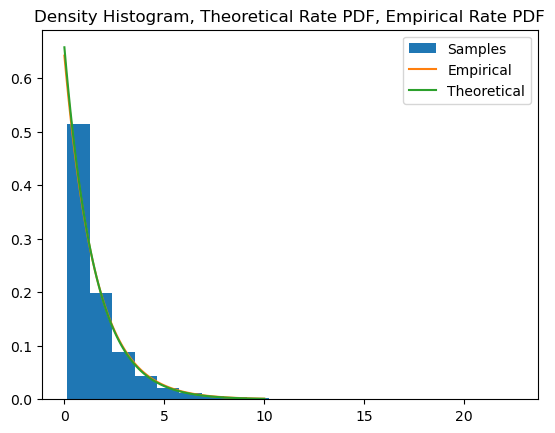

In [31]:
x = np.linspace(0,10, 100)
y = rate * np.exp(-rate * x)

plt.hist(data_clean, density=True, bins=20, label='Samples')
plt.plot(x, y, label='Empirical')
plt.plot(x, theoretical_rate * np.exp(-theoretical_rate * x), label='Theoretical')
plt.title('Density Histogram, Theoretical Rate PDF, Empirical Rate PDF')
plt.legend()
plt.show()

In [32]:
def exp_cdf(x, rate):
    return 1 - np.exp(-rate * x)

In [33]:
x_transformed = exp_cdf(data_clean, theoretical_rate)
x_sort_trans = np.sort(x_transformed)

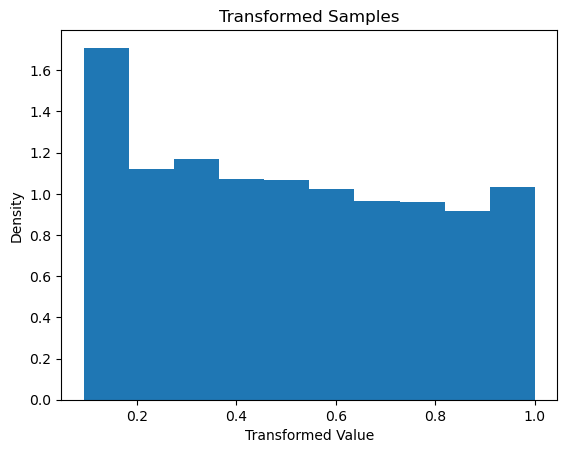

In [34]:
plt.hist(x_transformed, density=True, label='Transformed Samples')
plt.title('Transformed Samples')
plt.ylabel('Density')
plt.xlabel('Transformed Value')
plt.show()

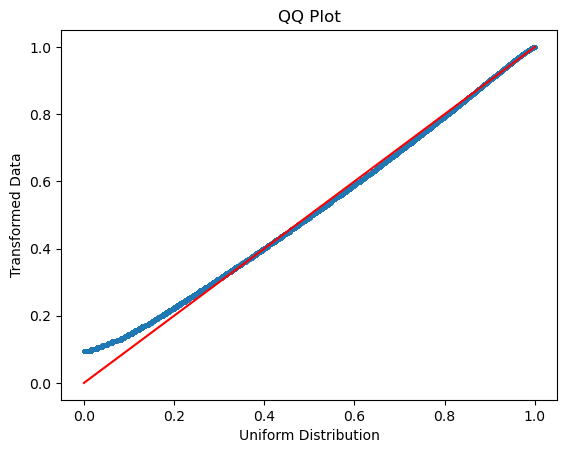

In [35]:
# generate a uniform distribution and plot qq plot for the transformed data

uniform = np.random.uniform(0,1, len
                                (data_clean))
uniform_sort = np.sort(uniform)

plt.scatter(uniform_sort, x_sort_trans, s=2)
plt.title('QQ Plot')
plt.xlabel('Uniform Distribution')
plt.ylabel('Transformed Data')
plt.plot([0,1],[0,1], color='red')
plt.show()

In [39]:
stats.cramervonmises(x_sort_trans, 'uniform')

CramerVonMisesResult(statistic=195.4064951046538, pvalue=6.999815782560148e-08)